# NX31 - Data Project

## Introduction

In the following data project, we  will be analyzing the workforce distribution between public and private sector over the total employment. We will futhermore look into, if the workforce distribution has changed from 2008 when the financial crises hit. We then compare the two, to see which contributes the most to the total changes in the workforce for Denmark.  

During the analysis, we will be doing the following.
* Establish an API connection to Statistics Denmark, to feed the analysis data.
* Clean and structure this data.
* Plot the data.
* Make an analysis and compare results.

## Packages imported

We will load the following packages and attributes for this data project.

In [1]:
# These two lines above makes sure that the functions and packages are automatically reloaded each time we run a cell.
%load_ext autoreload
%autoreload 2



In [2]:
# Imports the packages that are needed to run the project in full.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydst

### Data

We have choosen to use the PyDST package that can load data from Statistics Denmark using an API call. As we want to look into the workforce distribution, we start by finding the data we want using our browser on Statistic Denmark. From our research we will need to load the table "LBESK21". We put in the table id we just found, and start off by looking into, what variables that are present in the table.  

We use this information when we load in the data, to only get the data we want.

In [3]:
# Creates a variable that sets the pydst package to load data variables in english.
dst = pydst.Dst(lang='en') 

FTEG_variables = dst.get_variables(table_id = 'LBESK21')
FTEG_variables

,elimination,id,text,time,values
0,False,TAL,unit,False,"[{'id': '1020', 'text': 'Employees'}, {'id': '..."
1,True,SEKTOR,sector,False,"[{'id': '1000', 'text': 'All sectors'}, {'id':..."
2,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


In [39]:
# Shows what variables that is contained in the table
FTEG_variables['values'][1][:] 

[{'id': '1000', 'text': 'All sectors'},
 {'id': '1015', 'text': 'Central government'},
 {'id': '1020', 'text': 'Regional government'},
 {'id': '1025', 'text': 'Municipal government'},
 {'id': '1030', 'text': 'Social security funds'},
 {'id': '1035', 'text': 'Public corporations'},
 {'id': '1040', 'text': 'Private corporations'},
 {'id': '1045', 'text': 'Private nonprofit organizations'},
 {'id': '1050', 'text': 'Sector not stated'}]

We see that the data is split into two categories, employees, which include part-time employees and the likes. We are only interested in full-time employees(FTE) and thus we will only load in the data, containing the FTE.

### Creating Dictionaires

We create the following dictionaries to better structure the data and to create shorter or more precise variable names. </br>
We again use the variable names from above to make these dictionaires.

In [5]:
columns_dict = {} # creates a empty dictionairy, we fills the dictionary with keys and corosponding values.
# We use the variables seen earlier.
columns_dict['SEKTOR'] = 'Sector' 
columns_dict['TID'] = 'Quarter'
columns_dict['INDHOLD'] = 'FTE'

var_dict = {} # creates a empty dictionairy, we fills the dictionary with keys and corosponding values.
# We use the values seen earlier.
var_dict['Central government'] = 'Central'
var_dict['Regional government'] = 'Regional'
var_dict['Municipal government'] = 'Municipal'
var_dict['Social security funds'] = 'Social security funds'
var_dict['General government'] = 'Total'

### Importing Data

We now import data from Statistic Denmark using the PyDST. We use the variables we found above, so we only get the data that we need.
In this case we need all data from the table.

In [ ]:
FTEG_raw = dst.get_data(table_id = 'OBESK2', variables = {'SEKTOR':['*'], 'Tid':['*']})
# Creates a variable that contains data from the table we put in.
FTEG_raw.head(10) #shows the first 10 data points in the table.

### Renaming variables
We use the dictionaries to rename the variables names.

In [7]:
FTEG_raw.rename(columns = columns_dict, inplace = True) # renames the columns, using the keys,
# which are the current columns names, and use the values in the dictionary instead

for key, value in var_dict.items():
    FTEG_raw.Sector.replace(key, value, inplace = True) # runs a for loop to replace the variable names,
    # matching the keys and values from the var_dict

FTEG_raw.head(10)

,Sector,Quarter,FTE
0,Central,2008Q1,164276
1,Regional,2008Q1,111410
2,Municipal,2008Q1,431690
3,Social security funds,2008Q1,1921
4,Total,2008Q1,709297
5,Central,2008Q2,167654
6,Regional,2008Q2,107305
7,Municipal,2008Q2,438649
8,Social security funds,2008Q2,1913
9,Total,2008Q2,715521


### Table

We create this table to give a better view of the data, with the quaters as index.

In [8]:
FTEG = FTEG_raw.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
# creates a copy and pivot the data using the 'Quarter' as the index.
FTEG.head(10)

Sector,Central,Municipal,Regional,Social security funds,Total
Quarter,,,,,
2008Q1,164276,431690,111410,1921,709297
2008Q2,167654,438649,107305,1913,715521
2008Q3,166319,433840,111262,1849,713270
2008Q4,170749,441479,114385,1843,728455
2009Q1,169315,442231,114244,1843,727633
2009Q2,172790,449778,116310,1873,740750
2009Q3,170775,445803,115956,1889,734423
2009Q4,173914,450609,118369,1896,744787
2010Q1,172563,450873,117452,1860,742748


### Descirbetive statistics



In [9]:
FTEG_raw.groupby(['Sector']).describe() # Gives a table of decribtive statistics for analysis.
# Showing the mean, the std., the minimum, the quartiles and the maximum

FTE                                                    \
                      count           mean           std       min        25%   
Sector                                                                          
Central                44.0  173199.977273   2665.832350  164276.0  172505.00   
Municipal              44.0  430653.113636  12017.772657  413069.0  420759.25   
Regional               44.0  118347.772727   3491.849366  107305.0  116019.00   
Social security funds  44.0    1940.386364     96.370462    1843.0    1876.00   
Total                  44.0  724141.159091  10917.445550  706772.0  716269.75   

                                                      
                            50%        75%       max  
Sector                                                
Central                173527.5  174949.50  177641.0  
Municipal              428491.5  439356.50  457033.0  
Regional               119047.0  121126.25  122494.0  
Social security funds    1902.0    1987.75    2147.0  
Total                  722094.5  728439.25  751954.0

### Plot of public sectors

Text(0.5, 1.0, 'Public full-time employed')

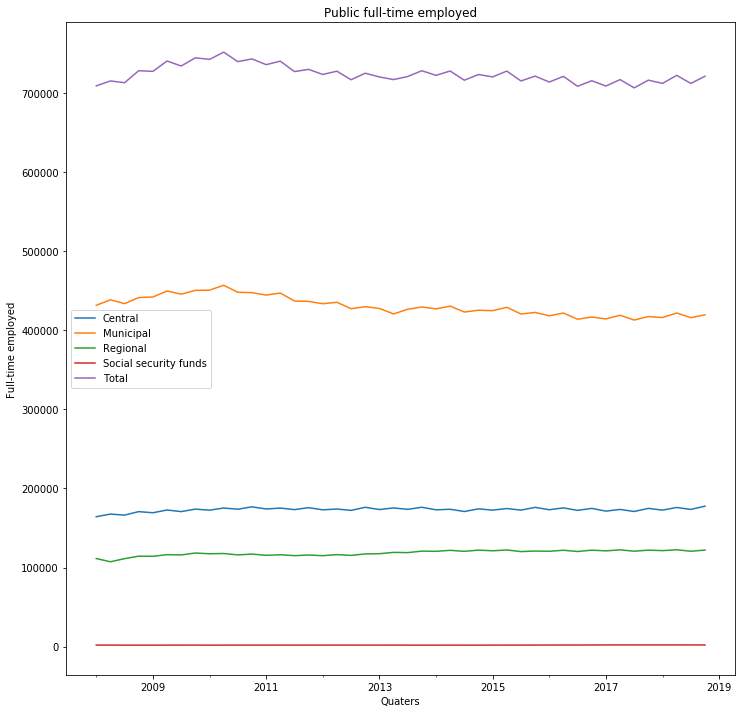

In [10]:
fig1, ax = plt.subplots(figsize=(12,12)) #creates a figure with only one subplot
FTEG_raw['Quarter'] = pd.to_datetime(FTEG_raw['Quarter']) # changes variable Quaters to a time format
# that pandas recognizes

FTEG_raw.set_index('Quarter').groupby('Sector')['FTE'].plot(x="Quarter", legend=True, ax=ax);
# sets index to new Quaters and plots the sectors values on y-axis

ax.set_ylabel("Full-time employed") # sets title for y-axis
ax.set_xlabel('Quaters') # sets title for x-axis
ax.set_title("Public full-time employed") # sets title for the figure

Looking at the plot above, it seems the development for total public employment is primarily is driven by changes in the municipalities. To confirm we will have to look at the relative changes.

### Relative changes and merging

Now we will look at the relative development of each sector.
We create four dataframes, one for each sector, where we devide the specific sector with the total public employment.

In [11]:
rc_central = pd.DataFrame(data=FTEG['Central']/FTEG['Total']*100)
rc_municipal = pd.DataFrame(FTEG['Municipal']/FTEG['Total']*100)
rc_regional = pd.DataFrame(FTEG['Regional']/FTEG['Total']*100)
rc_social = pd.DataFrame(FTEG['Social security funds']/FTEG['Total']*100)
# the four lines of code above creates a pandas dataframe for the relative development,
# and we multiply the 100 to get our result in percentage.

In order to plot the relative development later, we need to merge the four dataframes into one. We do this in the following code.

In [12]:
rFTEG_1 = pd.merge(rc_central, rc_municipal, on='Quarter') # merging the dataframe for relative central and
# municipalty development changes, and thereby creating a new dataframe contianing relative central and
# municipalty development changes

rFTEG_2 = pd.merge(rFTEG_1, rc_regional, on='Quarter') # we merge the new dataframe with the datafram for
# relative regionale development changes

rFTEG = pd.merge(rFTEG_2, rc_social, on='Quarter') # and again with social

rFTEG.head(10) # we plot our new dataframe, but observe that the variable names are not correct,
# we will solve this in the following code

,0_x,0_y,0_x,0_y
Quarter,,,,
2008Q1,23.160397,60.861670,15.707102,0.270832
2008Q2,23.431038,61.304839,14.996765,0.267358
2008Q3,23.317818,60.824092,15.598862,0.259229
2008Q4,23.439883,60.604842,15.702411,0.253001
2009Q1,23.269285,60.776655,15.700772,0.253287
2009Q2,23.326358,60.719271,15.701654,0.252852
2009Q3,23.252948,60.701122,15.788721,0.257209
2009Q4,23.350837,60.501727,15.893000,0.254569
2010Q1,23.233048,60.703361,15.813169,0.250421


### Renaming


We rename the colums for our new dataframe with relative development.

In [13]:
rFTEG.columns = ['Central', 'Municipal', 'Regional', 'Social']
rFTEG.head(10)

,Central,Municipal,Regional,Social
Quarter,,,,
2008Q1,23.160397,60.861670,15.707102,0.270832
2008Q2,23.431038,61.304839,14.996765,0.267358
2008Q3,23.317818,60.824092,15.598862,0.259229
2008Q4,23.439883,60.604842,15.702411,0.253001
2009Q1,23.269285,60.776655,15.700772,0.253287
2009Q2,23.326358,60.719271,15.701654,0.252852
2009Q3,23.252948,60.701122,15.788721,0.257209
2009Q4,23.350837,60.501727,15.893000,0.254569
2010Q1,23.233048,60.703361,15.813169,0.250421


The following code needs to be run twice in order to get the quarters to show correctly, we are not sure why.

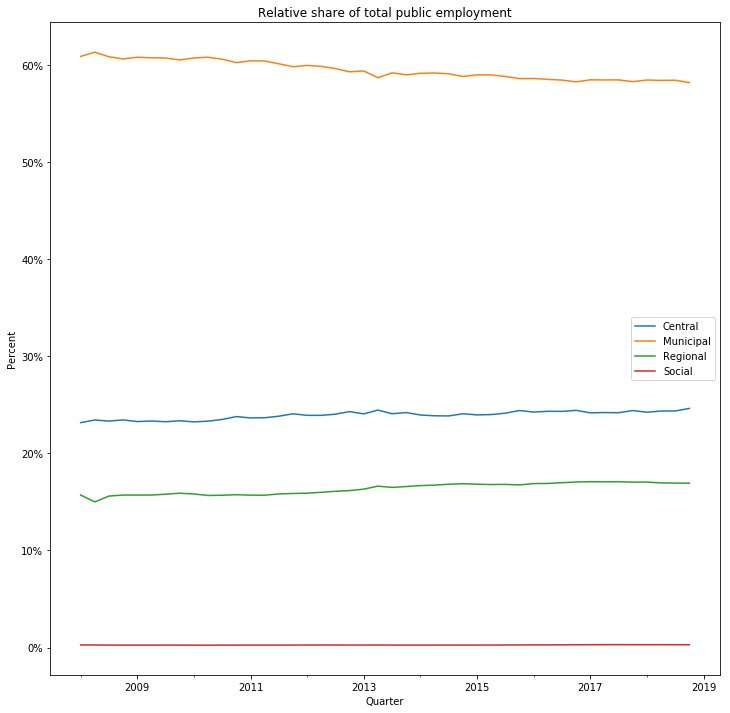

In [14]:
fig2, ax = plt.subplots(figsize=(12,12)) # creates a figure

rFTEG.reset_index(drop=True) # resets the index
FTEG_raw.set_index('Quarter') # sets Quarter as index
rFTEG.index = pd.DatetimeIndex(data=rFTEG.index) # set the index to be the time index on the x-axis

import matplotlib.ticker as mtick # imports a package used for aplying name format on the axis

fmt = '%.0f%%' # setting the format in percent
yticks = mtick.FormatStrFormatter(fmt) # defining the format on the y-axis
ax.yaxis.set_major_formatter(yticks) # setting the format for the y-axis

ax.set_xlabel("Quarters") # sets the lable for the x-axis
ax.set_ylabel("Percent") # sets the lable for the y-axis
ax.set_title("Relative share of total public employment") # sets the title for the figure

rFTEG.plot(legend=True, ax=ax); # select data to be plotted

We see that the relative contribution from the municipalties to total public employment is falling, and is the sector changing the most.

### Interactive Figure for relative development

Unfortunately we could not get this to work, please comment if you have any ideas.
Our wish was to have a dropdown widget so you could choose wich one you would like to look at.

In [15]:
import ipywidgets as widgets # imports the widget for interactive figures

In [16]:
def plot_e(dataframe, Central): ax = dataframe.loc[:,[Central]].plot()

mylist = rFTEG.columns.unique().tolist()
widgets.interact(plot_e, dataframe = widgets.fixed(rFTEG), Central = widgets.Dropdown(description='Sector', options=mylist) );

interactive(children=(Dropdown(description='Sector', options=('Central', 'Municipal', 'Regional', 'Social'), v…

### New data - including private employment

To compare the public employment to that of the employment in the private sector, we need data for the private sector. We have found a table that has this, and will now do the same precedings as we did with the data for the public sector.

In [17]:
FTEP_variables = dst.get_variables(table_id = 'LBESK21')
# creates a variable that contains the variables from the table we look at
FTEP_variables # shows the variables

,elimination,id,text,time,values
0,False,TAL,unit,False,"[{'id': '1020', 'text': 'Employees'}, {'id': '..."
1,True,SEKTOR,sector,False,"[{'id': '1000', 'text': 'All sectors'}, {'id':..."
2,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


In [18]:
FTEP_variables['values'][0][:] # shows the sectors in the table

[{'id': '1020', 'text': 'Employees'},
 {'id': '1010', 'text': 'Full-time employees'}]

### Dictionaries

In [19]:
columns_dict3 = {} # creates a empty dictionairy, we fills the dictionary with keys and corosponding values.
# We use the variables seen earlier.
columns_dict3['TAL'] = 'Type'
columns_dict3['SEKTOR'] = 'Sector'
columns_dict3['TID'] = 'Quarter'
columns_dict3['INDHOLD'] = 'FTE'

var_dict2 = {} # creates a empty dictionairy, we fills the dictionary with keys and corosponding values.
# We use the variables seen earlier.
var_dict2['All sectors'] = 'Total'
var_dict2['Central government'] = 'Central'
var_dict2['Regional government'] = 'Regional'
var_dict2['Municipal government'] = 'Municipal'
var_dict2['Social security funds'] = 'Social'
var_dict2['Public corporations'] = 'Public corp'
var_dict2['Private corporations'] = 'Private corp'
var_dict2['Private nonprofit organizations'] = 'Private NPO'
var_dict2['Sector not stated'] = 'SNS'

### New data - Private employment

We now get the data which include the private sector and structure this in the same way, so we can compare the private and public workforce.

In [20]:
FTEP_raw = dst.get_data(table_id = 'LBESK21', variables = {'TAL':['*'], 'SEKTOR':['*'], 'Tid':['*']})
FTEP_raw.head(10)

,TAL,SEKTOR,TID,INDHOLD
0,Full-time employees,All sectors,2008Q1,2245921
1,Full-time employees,Central government,2008Q1,164276
2,Full-time employees,Regional government,2008Q1,111410
3,Full-time employees,Municipal government,2008Q1,431690
4,Full-time employees,Social security funds,2008Q1,1921
5,Full-time employees,Public corporations,2008Q1,66524
6,Full-time employees,Private corporations,2008Q1,1419034
7,Full-time employees,Private nonprofit organizations,2008Q1,50890
8,Full-time employees,Sector not stated,2008Q1,176
9,Employees,All sectors,2008Q1,2685665


### Renaming variables
We use the dictionaries to rename the variables names.

In [21]:
FTEP_raw.rename(columns = columns_dict3, inplace = True)

for key, value in var_dict2.items():
    FTEP_raw.Sector.replace(key, value, inplace = True)

FTEP_raw.head(10)

,Type,Sector,Quarter,FTE
0,Full-time employees,Total,2008Q1,2245921
1,Full-time employees,Central,2008Q1,164276
2,Full-time employees,Regional,2008Q1,111410
3,Full-time employees,Municipal,2008Q1,431690
4,Full-time employees,Social,2008Q1,1921
5,Full-time employees,Public corp,2008Q1,66524
6,Full-time employees,Private corp,2008Q1,1419034
7,Full-time employees,Private NPO,2008Q1,50890
8,Full-time employees,SNS,2008Q1,176
9,Employees,Total,2008Q1,2685665


### Cleaning, sorting and merging

As we are only interested in making the analysis on the total amount of employees, we create a new dataframe, including the total amount of Full-time employees from the private and the public sector and see the developments in the workforce from 2008 Q1 till 2018 Q4. 

In [22]:
FTE2 = FTEP_raw[(FTEP_raw['Type'] == 'Full-time employees') & (FTEP_raw['Sector'] == 'Total')]
FTEG2 = FTEP_raw[(FTEP_raw['Type'] == 'Full-time employees') & (FTEP_raw['Sector'] == 'Central') + (FTEP_raw['Sector'] == 'Regional') + (FTEP_raw['Sector'] == 'Municipal') + (FTEP_raw['Sector'] == 'Social')]
FTEP2 = FTEP_raw[(FTEP_raw['Type'] == 'Full-time employees') & (FTEP_raw['Sector'] == 'Private corp') + (FTEP_raw['Sector'] == 'Public corp') + (FTEP_raw['Sector'] == 'Private NPO')]
# The above lines, create 3 dataframes by selecting only the data we need, FTEs and split it in 3, Public, Private and Total workforce.

print(FTE2.head(10))
print(FTEG2.head(10))
print(FTEP2.head(10))


                    Type Sector Quarter      FTE
0    Full-time employees  Total  2008Q1  2245921
18   Full-time employees  Total  2008Q2  2293127
36   Full-time employees  Total  2008Q3  2266707
54   Full-time employees  Total  2008Q4  2285036
72   Full-time employees  Total  2009Q1  2214306
90   Full-time employees  Total  2009Q2  2203450
108  Full-time employees  Total  2009Q3  2169636
126  Full-time employees  Total  2009Q4  2170454
144  Full-time employees  Total  2010Q1  2114063
162  Full-time employees  Total  2010Q2  2158461
                   Type     Sector Quarter     FTE
1   Full-time employees    Central  2008Q1  164276
2   Full-time employees   Regional  2008Q1  111410
3   Full-time employees  Municipal  2008Q1  431690
4   Full-time employees     Social  2008Q1    1921
19  Full-time employees    Central  2008Q2  167654
20  Full-time employees   Regional  2008Q2  107305
21  Full-time employees  Municipal  2008Q2  438649
22  Full-time employees     Social  2008Q2    1913
37

C:\Users\45262\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


To reach our final dataframe containing total, private and public employment, we create three new dataframes for total, private and public employment.
we use the copy/pivot to make sure that our three dataframes have the same index and dimensions.

In [23]:
FTE2_pivot = FTE2.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
# creates a copy and pivot the data using the 'Quarter' as the index
FTE_total = pd.DataFrame(data = FTE2_pivot['Total']) # creates a dataframe

FTEG2_pivot = FTEG2.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
FTEG_total = pd.DataFrame(data = FTEG2_pivot['Central'] + FTEG2_pivot['Regional'] + FTEG2_pivot['Municipal'] + FTEG2_pivot['Social'])
FTEG_total.columns = ['FTEG'] # renames the column  

FTEP2_pivot = FTEP2.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
FTEP_total = pd.DataFrame(data = FTEP2_pivot['Private corp'] + FTEP2_pivot['Public corp'] + FTEP2_pivot['Private NPO'])
FTEP_total.columns = ['FTEP']

print(FTE_total.head(10))
print(FTEG_total.head(10))
print(FTEP_total.head(10))

           Total
Quarter         
2008Q1   2245921
2008Q2   2293127
2008Q3   2266707
2008Q4   2285036
2009Q1   2214306
2009Q2   2203450
2009Q3   2169636
2009Q4   2170454
2010Q1   2114063
2010Q2   2158461
           FTEG
Quarter        
2008Q1   709297
2008Q2   715521
2008Q3   713270
2008Q4   728456
2009Q1   727633
2009Q2   740751
2009Q3   734423
2009Q4   744788
2010Q1   742748
2010Q2   751953
            FTEP
Quarter         
2008Q1   1536448
2008Q2   1577435
2008Q3   1553282
2008Q4   1556435
2009Q1   1486514
2009Q2   1462542
2009Q3   1435027
2009Q4   1425493
2010Q1   1371162
2010Q2   1406348


Now we merge the three dataframes to get our desired dataframe.

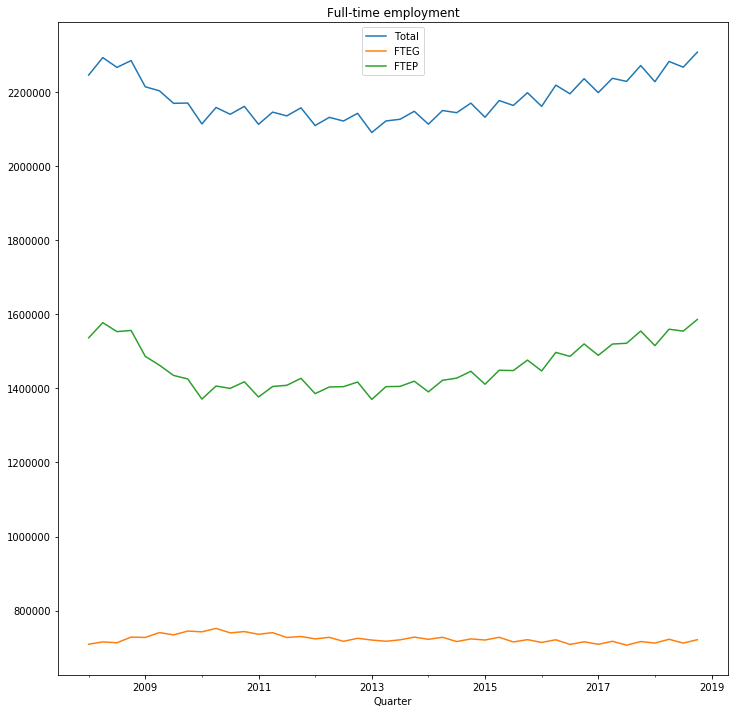

In [24]:
FTE1 = pd.merge(FTE_total, FTEG_total, on='Quarter') # merging total and public employment
FTE = pd.merge(FTE1, FTEP_total, on='Quarter') # merging private employment with total and public employment

FTE.index = pd.DatetimeIndex(data=FTE.index) # sets the index to a time index, which is still Quarter but in another format

FTE.plot(figsize=(12,12), title='Full-time employment') # plots our final figure

In 2010 we see the lowest private employment in the period, where the private employment is close to 1.3 million employees, almost 300.000 lower than the peak before the crises. From 2010 the employment slowly grows from 2010 and up to around the same level as before the crises, in 2018 Q4.

From the figure above we see that the majority of the cotribution to the changes in the total employments, stems from the private sector. The public sector is relatively flat, which makes sense intuatively, as the public sector is less exposed to conjuctions as well as the grotwh or decrease is politically decided.
